Assignment 4 - Ensemble Methods

# Importing Packages

In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Loading Data

In [70]:
# Add File Path of the CSV file here
file_path = "C:/Users/johne/Downloads/Electronic_sales_Sep2023-Sep2024.csv"
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Looking at Data

In [71]:
# Check for missing data in the dataset
missing_data = df.isnull().sum()
print(missing_data)

# Display basic statistics for the dataset
basic_statistics = df.describe()
print(basic_statistics)

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64
        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.00000

# Prepping Dataset for Modeling:

In [72]:
# Fill missing values in 'Add-ons Purchased' with a default value of 0
df['Add-ons Purchased'].fillna(0, inplace=True)

# Identify categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

# One-hot encode all categorical features
df = pd.get_dummies(df, columns=categorical_columns)

# Label encode 'Gender' and other binary categorical features
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
if 'Loyalty Member' in df.columns:
    df['Loyalty Member'] = le.fit_transform(df['Loyalty Member'])

# Verify that all features are numerical
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Non-numeric column found: {column}")

C:\Users\johne\AppData\Local\Temp\ipykernel_17644\1627155597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Add-ons Purchased'].fillna(0, inplace=True)


# Model Implementation

In [73]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Total Price'])
y = df['Total Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
from sklearn.tree import export_text

# Print each tree in the Random Forest
for i, tree in enumerate(rf_model.estimators_):
    print(f"Tree {i}:")
    print(export_text(tree, feature_names=list(X.columns)))
    print("\n" + "-"*50 + "\n")

Tree 0:
|--- Unit Price <= 569.14
|   |--- Quantity <= 5.50
|   |   |--- Unit Price <= 304.10
|   |   |   |--- SKU_SKU1002 <= 0.50
|   |   |   |   |--- Quantity <= 3.50
|   |   |   |   |   |--- Quantity <= 1.50
|   |   |   |   |   |   |--- value: [20.75]
|   |   |   |   |   |--- Quantity >  1.50
|   |   |   |   |   |   |--- Quantity <= 2.50
|   |   |   |   |   |   |   |--- value: [41.50]
|   |   |   |   |   |   |--- Quantity >  2.50
|   |   |   |   |   |   |   |--- value: [62.25]
|   |   |   |   |--- Quantity >  3.50
|   |   |   |   |   |--- Quantity <= 4.50
|   |   |   |   |   |   |--- value: [83.00]
|   |   |   |   |   |--- Quantity >  4.50
|   |   |   |   |   |   |--- value: [103.75]
|   |   |   |--- SKU_SKU1002 >  0.50
|   |   |   |   |--- Quantity <= 3.50
|   |   |   |   |   |--- Quantity <= 2.50
|   |   |   |   |   |   |--- Quantity <= 1.50
|   |   |   |   |   |   |   |--- value: [247.03]
|   |   |   |   |   |   |--- Quantity >  1.50
|   |   |   |   |   |   |   |--- Customer ID <

# Model Evaluation

In [76]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

RMSE: 0.05145853427735869
MAE: 0.0014092500050202049
R^2 Score: 0.9999999995901449


c:\Users\johne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Visualization

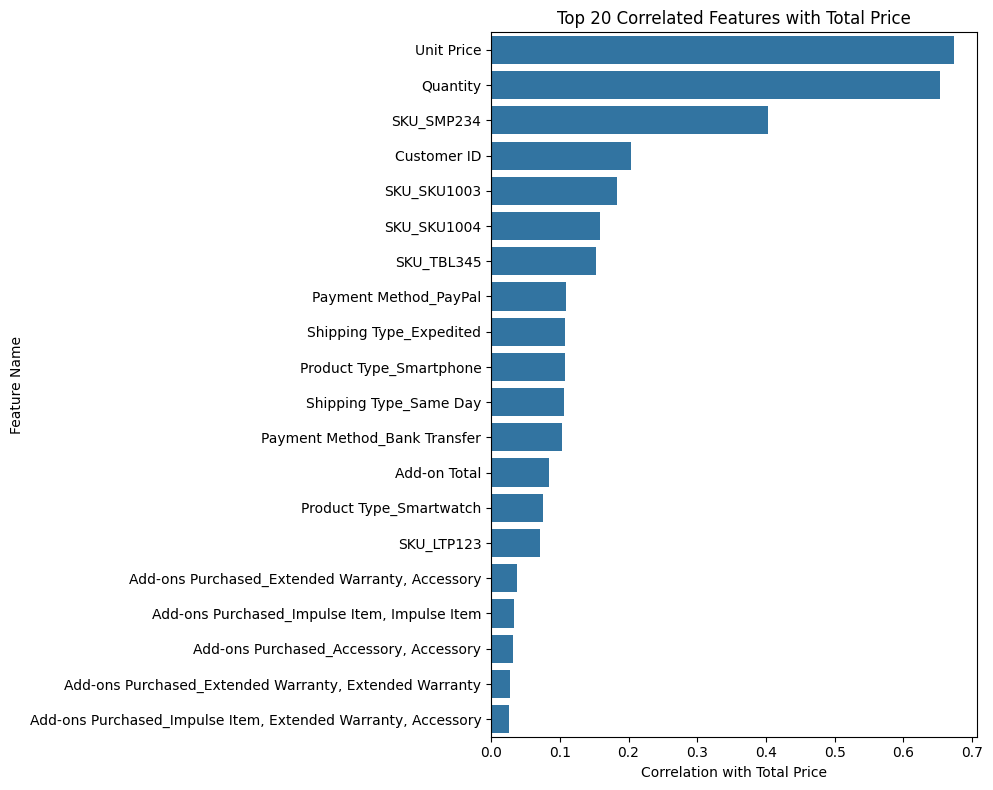

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations with the target variable
correlations = df.corr()['Total Price'].sort_values(ascending=False)

# Select the top 20 correlated features (excluding the target itself)
top_features = correlations[1:21]  # Exclude 'Total Price' itself

# Plot correlation with the target variable using a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index, orient='h')
plt.xlabel('Correlation with Total Price')
plt.ylabel('Feature Name')
plt.title('Top 20 Correlated Features with Total Price')
plt.tight_layout()
plt.show()

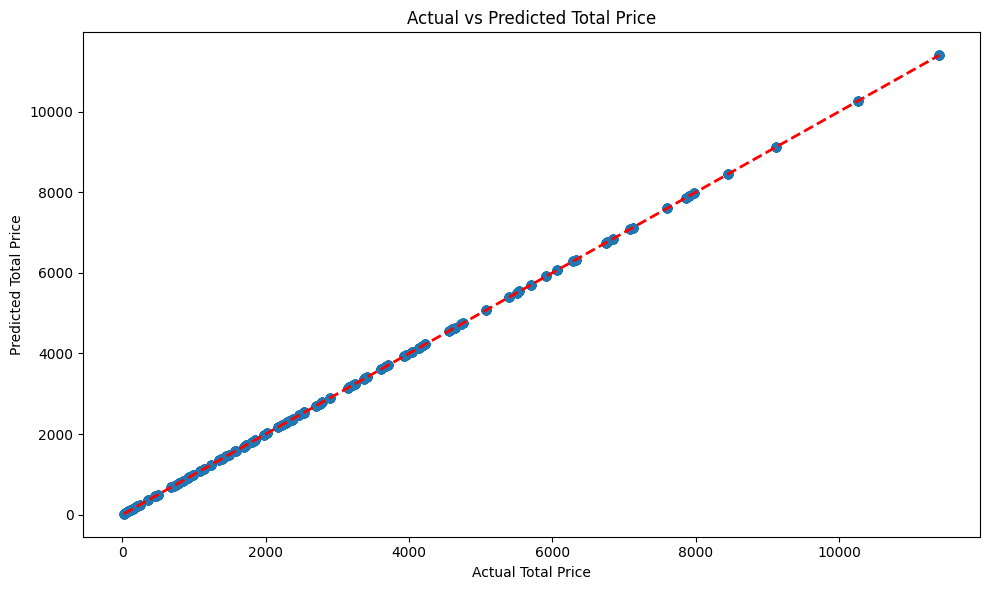

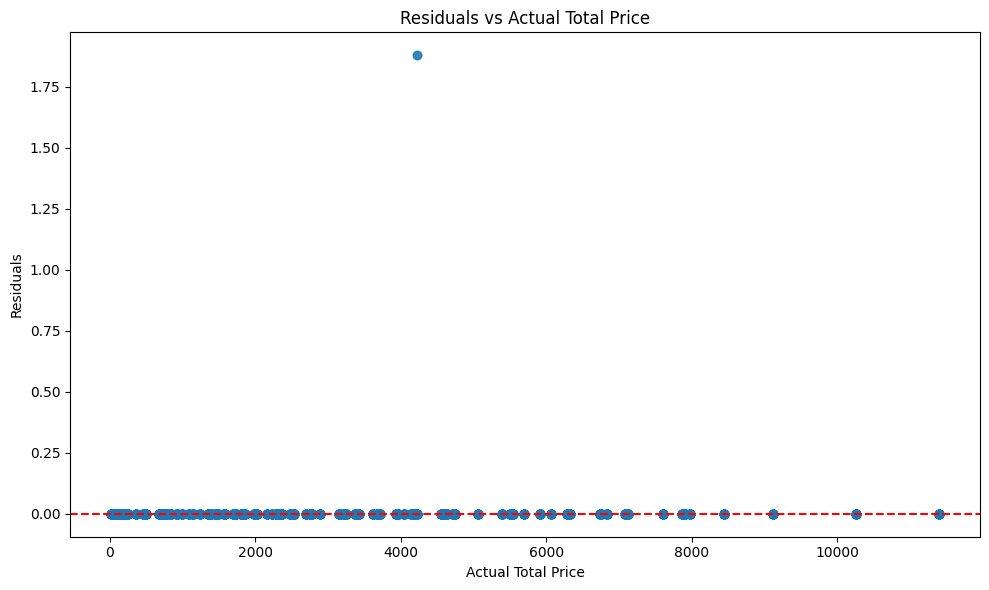

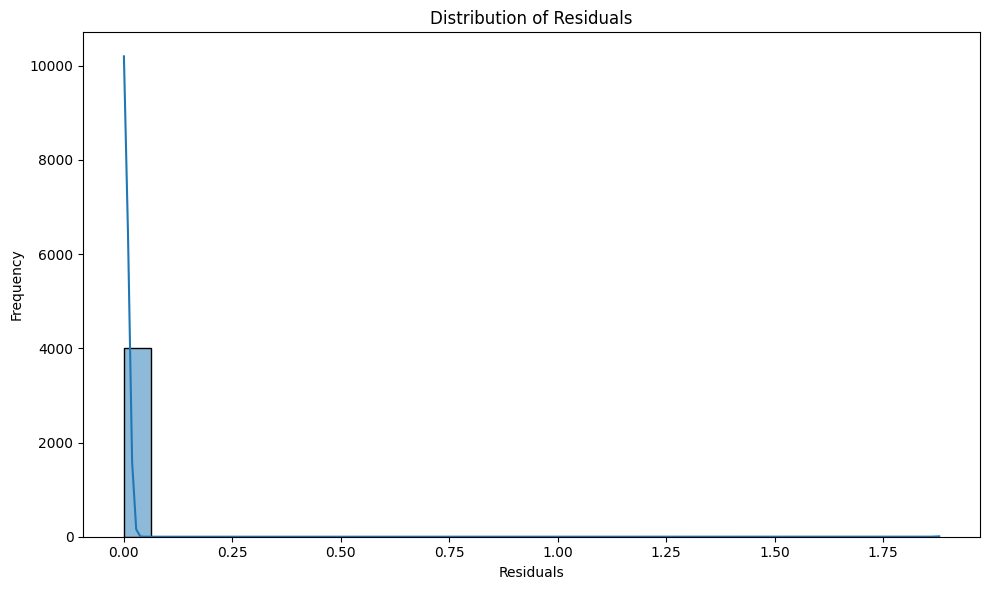

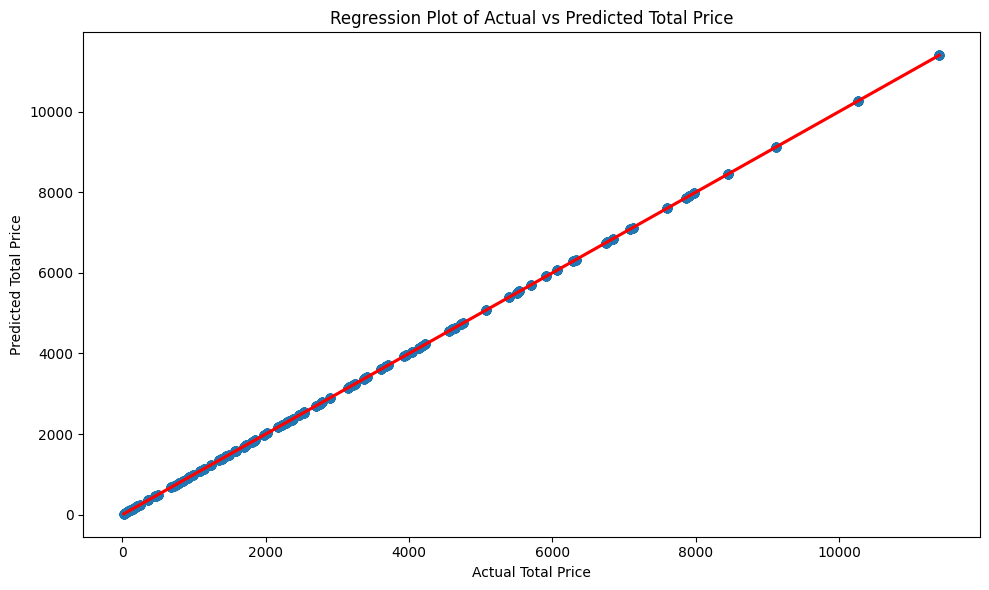

In [79]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.tight_layout()
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Take a sample of residuals to avoid memory issues
sampled_residuals = residuals.sample(frac=0.1, random_state=42)  # Use 10% of data


plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Total Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Total Price')
plt.tight_layout()
plt.show()




plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Regression Plot of Actual vs Predicted Total Price')
plt.tight_layout()
plt.show()


